


#### The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

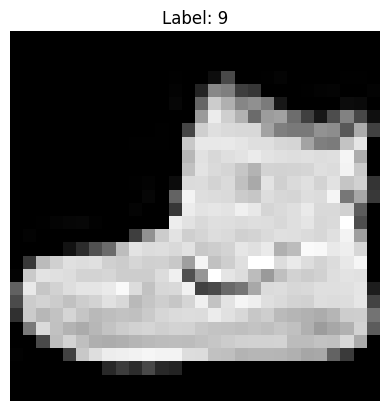

In [2]:
import matplotlib.pyplot as plt

# Display image number 0 from the training set
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')  # Optional: hides axis ticks
plt.show()


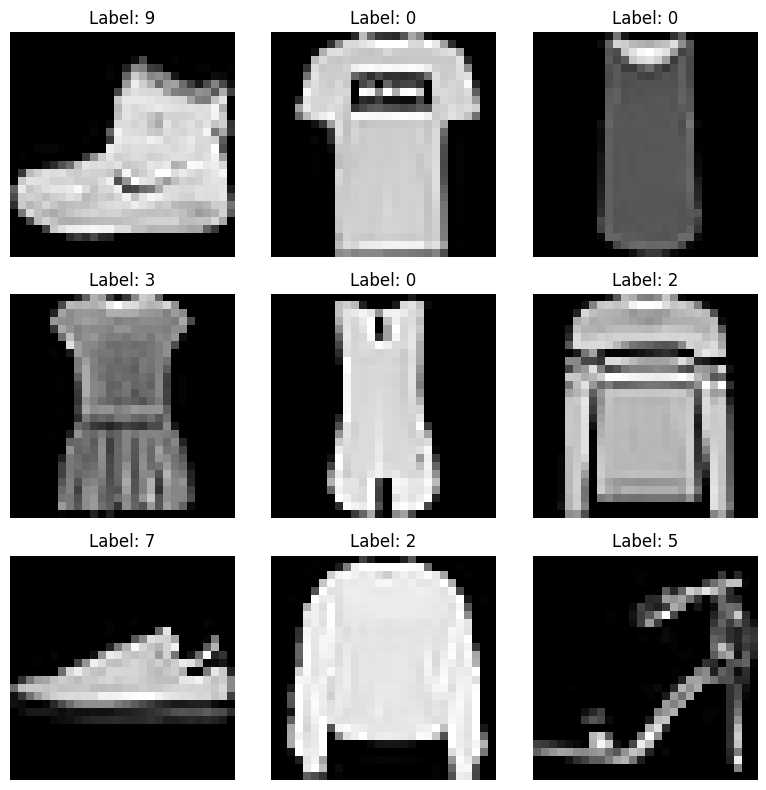

In [3]:
# Show the first 9 images
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


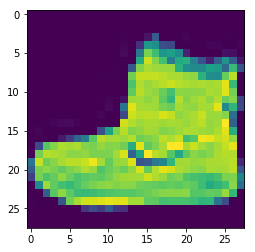

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [19]:
from tensorflow.keras.datasets import fashion_mnist

# Cargar los datos otra vez (resetea para evitar datos ya normalizados)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.max())



255


In [20]:
# Normalizar los datos
x_train = x_train / 255.0
x_test = x_test / 255.0


**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [21]:
# Current shape is (60000, 28, 28)
print("Before reshape:", x_train.shape)





Before reshape: (60000, 28, 28)


In [22]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [23]:
print("After reshape:", x_train.shape)


After reshape: (60000, 28, 28, 1)


**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [24]:
print("Before one-hot encoding:", y_train[0])  # Example label


Before one-hot encoding: 9


In [26]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [27]:
print("After one-hot encoding:", y_train[0])


After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(filters=32, kernel_size=(4,4), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [30]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [31]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,          # You can adjust batch size
    validation_split=0.2    # 20% of train data used for validation
)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.7734 - loss: 0.6523 - val_accuracy: 0.8726 - val_loss: 0.3526
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.8844 - loss: 0.3191 - val_accuracy: 0.8867 - val_loss: 0.3133
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.9024 - loss: 0.2683 - val_accuracy: 0.9012 - val_loss: 0.2697
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.9160 - loss: 0.2287 - val_accuracy: 0.8992 - val_loss: 0.2743
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9228 - loss: 0.2039 - val_accuracy: 0.9101 - val_loss: 0.2517
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9308 - loss: 0.1881 - val_accuracy: 0.9055 - val_loss: 0.2714
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9397 - loss: 0.1680 - val_accuracy: 0.9113 - val_loss: 0.2628
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9445 - loss: 0.1486 - 

Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1802 - acc: 0.9365
Epoch 2/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1679 - acc: 0.9395
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.1579 - acc: 0.9439
Epoch 4/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1502 - acc: 0.9469
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1427 - acc: 0.9496
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1397 - acc: 0.9523
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1312 - acc: 0.9551
Epoch 8/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1274 - acc: 0.9559
Epoch 9/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1238 - acc: 0.9582
Epoch 10/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1201 - acc: 0.9588

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [32]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

In [33]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Test loss: 0.2881
Test accuracy: 0.9061


['loss', 'acc']

In [34]:
y_pred_probs = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [35]:
y_pred = np.argmax(y_pred_probs, axis=1)


In [36]:
y_true = np.argmax(y_test, axis=1)


In [37]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.8180    0.8810    0.8483      1000
           1     0.9909    0.9790    0.9849      1000
           2     0.7944    0.9160    0.8509      1000
           3     0.9218    0.9080    0.9149      1000
           4     0.8481    0.8600    0.8540      1000
           5     0.9761    0.9790    0.9775      1000
           6     0.8033    0.6410    0.7130      1000
           7     0.9528    0.9700    0.9613      1000
           8     0.9867    0.9670    0.9768      1000
           9     0.9756    0.9600    0.9677      1000

    accuracy                         0.9061     10000
   macro avg     0.9068    0.9061    0.9049     10000
weighted avg     0.9068    0.9061    0.9049     10000



             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.88      0.83      0.85      1000
          3       0.91      0.91      0.91      1000
          4       0.83      0.88      0.85      1000
          5       0.97      0.98      0.98      1000
          6       0.73      0.76      0.74      1000
          7       0.95      0.97      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000

